In [5]:
import torch
import numpy
import pickle

import 

In [13]:
import pickle

with open("/orcd/data/omarabu/001/opitcho/GPT_3.5_Embedding_scLAMBDA.pickle", "rb") as f:
    generep_dict = pickle.load(f)

In [18]:
tensors = []
for key in generep_dict:
    tensors.append(torch.from_numpy(generep_dict[key]))

gene_representations = torch.stack(tensors)
gene_representations.shape

torch.Size([33703, 3072])

In [19]:
len(generep_dict.keys())

33703

/orcd/data/omarabu/001/opitcho/miniforge3/envs/omnicell/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running PCA...
PCA DONE
Variance explained by 100 PCs: 0.703
Running UMAP...


/orcd/data/omarabu/001/opitcho/miniforge3/envs/omnicell/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/orcd/data/omarabu/001/opitcho/miniforge3/envs/omnicell/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP DONE


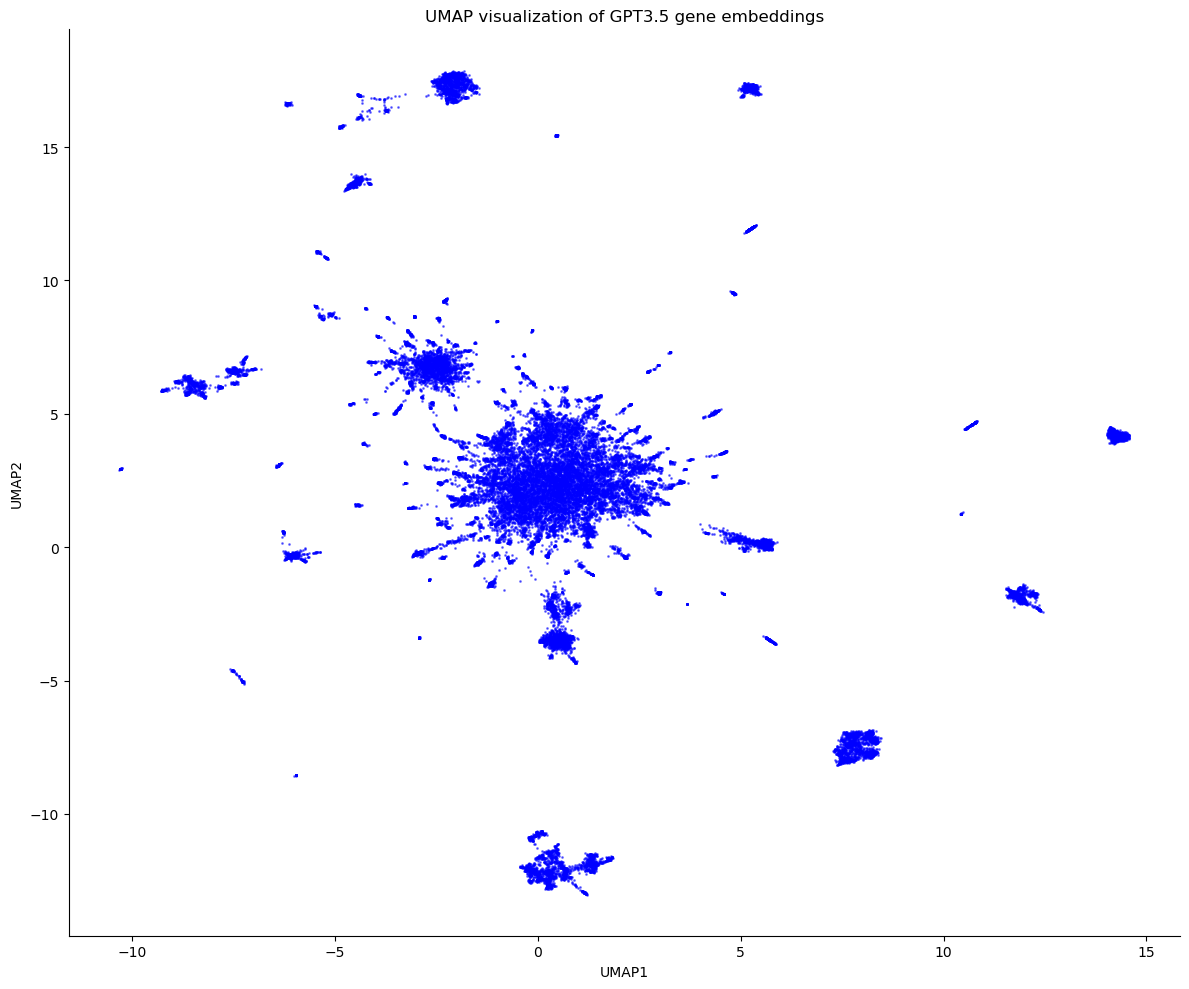

In [20]:
import torch
import umap
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to numpy and standardize
data = gene_representations.cpu().numpy()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# PCA first - reduce to 100 dimensions
print("Running PCA...")
pca = PCA(n_components=100)
data_pca = pca.fit_transform(data_scaled)

print("PCA DONE")
# Calculate variance explained
var_explained = pca.explained_variance_ratio_.cumsum()
print(f"Variance explained by 100 PCs: {var_explained[-1]:.3f}")

# UMAP on PCA results
print("Running UMAP...")
reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    random_state=42,
    low_memory=True
)
embedding = reducer.fit_transform(data_pca)
print("UMAP DONE")
# Plot
plt.figure(figsize=(12, 10))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=1,
    alpha=0.5,
    c='blue'
)

plt.title('UMAP visualization of GPT3.5 gene embeddings')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
sns.despine()
plt.tight_layout()
plt.show()